In [ ]:
try:
  print("Dependencies are already installed. Skipping...")
  import qiskit
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_histogram,plot_bloch_multivector
  from qiskit import Aer,execute
  from qiskit.quantum_info import partial_trace,Statevector
  from qiskit_textbook.tools import random_state
  from qiskit.extensions import Initialize
except:
  print("Installing Corresponing Dependencies")
  ! pip install -q qiskit pylatexenc qiskit-aer
  ! pip install -q git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
  import qiskit
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_histogram,plot_bloch_multivector
  from qiskit.quantum_info import partial_trace,Statevector
  from qiskit import Aer,execute
  from qiskit.quantum_info import partial_trace,Statevector
  from qiskit_textbook.tools import random_state
  from qiskit.extensions import Initialize

Dependencies are already installed. Skipping...
Installing Corresponing Dependencies
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.7 MB/s eta 0:00:00


In [ ]:
import numpy as np

In [ ]:
qiskit.__version__

'0.25.3'

In [ ]:
!rm -r modules

rm: cannot remove 'modules': No such file or directory


In [ ]:
import requests
from pathlib import Path
import os

directory = Path("modules")

if not os.path.exists(directory):
  os.makedirs(directory)

helper_modules = {
    "quantum_hardware_circuits.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/quantum_hardware_functions/quantum_hardware_circuits.py",
    "experiment_utils.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/utils/experiment_utils.py",
    "algorithms_utils.py":"https://github.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/raw/master/modules/utils/algorithms_utils.py"
    }

for module,raw in helper_modules.items():
  module_file = directory / module
  if(module_file.exists()):
    print(f"Module: {module_file} already exists. Skipping...")
  else:
    print(f"Downloading {module}")
    request = requests.get(raw)
    with open(module_file,"wb") as f:
      f.write(request.content)

In [ ]:
from modules.experiment_utils import ideal_qc_simulation,get_target_measurement,initialize_quantum_circuit,reverse_output,make_meaurement
from modules.algorithms_utils import *

In [ ]:
backend = Aer.get_backend('statevector_simulator')

In [ ]:
def hamiltonian(t):
  qc = QuantumCircuit(2, 2)
  qc.h(range(2))
  qc.cx(0, 1)
  qc.rz(np.pi*t, 1)
  qc.cx(0, 1)
  qc.h(range(2))
  qc.measure(range(2), range(2))
  return qc

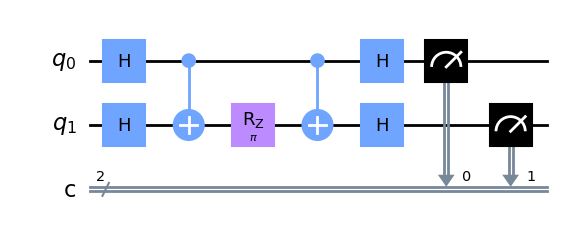

In [ ]:
qc = hamiltonian(1)
qc.draw("mpl")

In [ ]:
measurement = ideal_qc_simulation(qc,backend)
list(measurement.keys())[0]

'11'

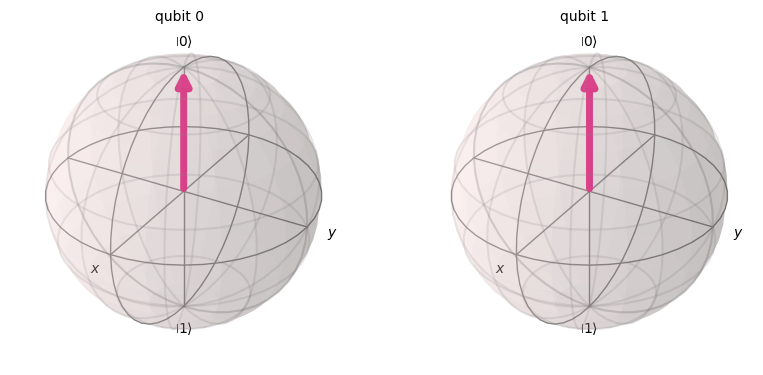

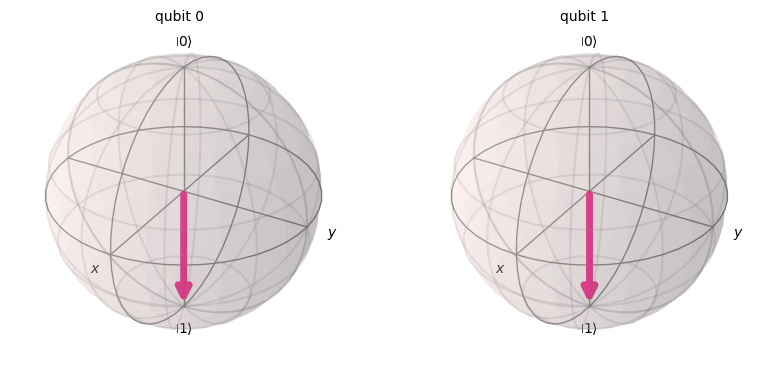

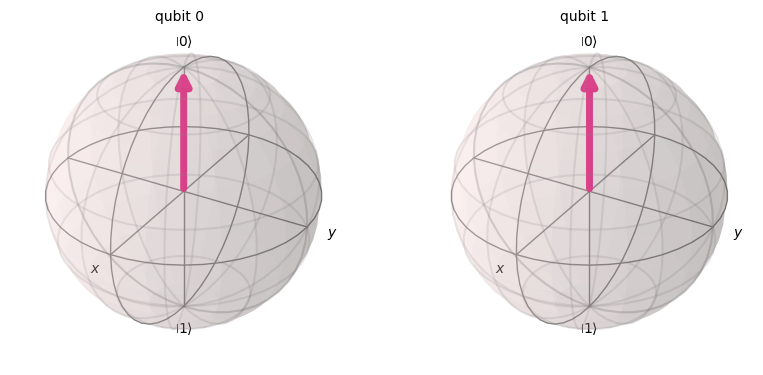

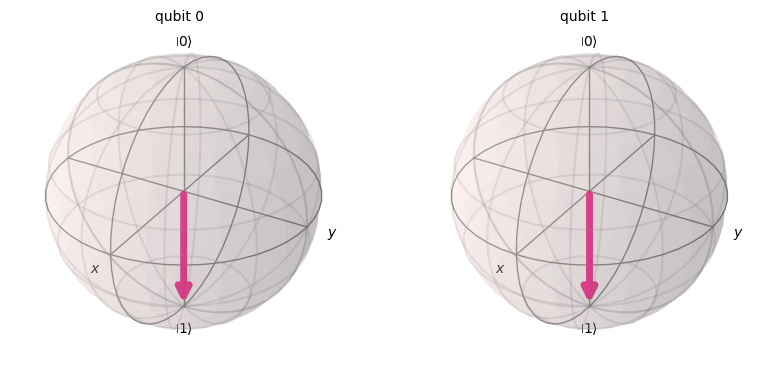

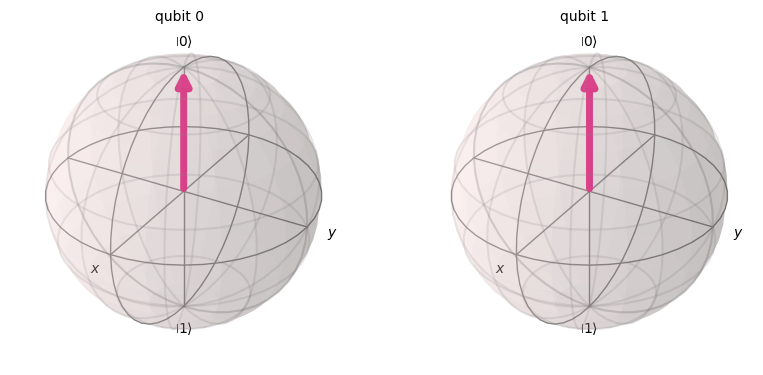

In [ ]:
for t in range(5):
  qc = hamiltonian(t)
  display(plot_bloch_multivector(execute(qc, backend).result().get_statevector(qc)))